## Multivariant



Multivariate Linear Regression is an extension of linear regression that models the relationship between a dependent variable and two or more independent variables. It seeks to understand how multiple features influence a single outcome by fitting a linear equation to the observed data.

Applications of Multivariate Linear Regression:Economics: Analyzing the effects of various economic indicators on GDP.Healthcare: Investigating how multiple risk factors affect patient outcomes, such as the impact of age, weight, and lifestyle on blood pressure.Real Estate: Estimating property prices based on features such as location, square footage, number of bedrooms, and age of the property.Marketing: Evaluating the effect of multiple marketing channels on sales performance.

Coefficients:  [150.  10.]
Intercept:  -349.99999999999864
Predictions:  [350. 470.]
Mean Squared Error:  7.754818242684634e-27


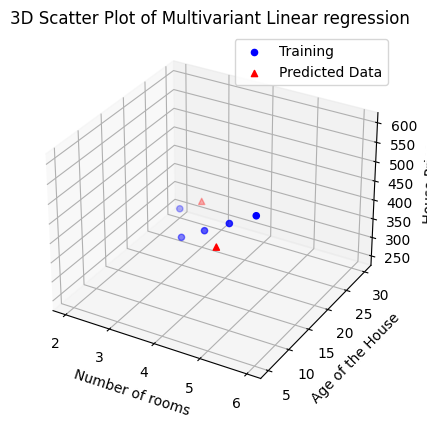

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X= np.array([[3,20],[4,15],[2,30],[5,10],[6,5]])

y=np.array([300,400,250,500,600])

model=LinearRegression()
model.fit(X,y)


X_test = np.array([[3,25], [5,7]])
y_pred = model.predict(X_test)

print("Coefficients: ",model.coef_)
print("Intercept: ",model.intercept_)
print("Predictions: ",y_pred)

y_pred_train = model.predict(X)
mse_train = mean_squared_error(y, y_pred_train)
print("Mean Squared Error: ",mse_train)

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(X[:,0],X[:,1],y,c='blue',marker='o', label='Training')
ax.scatter(X_test[:,0],X_test[:,1],y_pred,c='red',marker='^',label='Predicted Data')

ax.set_xlabel('Number of rooms')
ax.set_ylabel('Age of the House')
ax.set_zlabel('House Price')
ax.set_title('3D Scatter Plot of Multivariant Linear regression')
ax.legend()
plt.show()



Coefficients: [150.  10.]
Intercept: -349.99999999999864
Predictions: [350. 470.]
Mean Squared Error: 7.754818242684634e-27


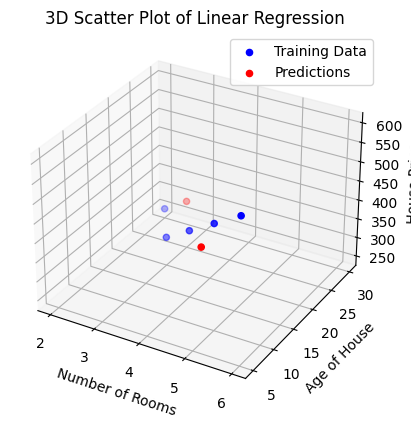

In [ ]:
# @title
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.array([[3, 20], [4, 15], [2, 30], [5, 10], [6, 5]])
y = np.array([300, 400, 250, 500, 600])

model = LinearRegression()
model.fit(X, y)

X_test = np.array([[3, 25], [5, 7]])
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Predictions:", y_pred)
print("Mean Squared Error:", mean_squared_error(y, model.predict(X)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='blue', label='Training Data')
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', label='Predictions')
ax.set_xlabel('Number of Rooms')
ax.set_ylabel('Age of House')
ax.set_zlabel('House Price')
ax.set_title('3D Scatter Plot of Linear Regression')
ax.legend()
plt.show()


## Linear Regression

Linear Regression is a fundamental statistical technique used in machine learning and data analysis for modeling the relationship between a dependent variable (target) and one or more independent variables (features). The goal is to find the linear equation that best predicts the target variable based on the features.

Types:
Simple and multi linear

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '/content/loan-train.csv'
data = pd.read_csv(file_path)

for column in ['Gender', 'Dependents', 'Self_Employed']:
    data[column].fillna(data[column].mode()[0], inplace=True)

for column in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    data[column].fillna(data[column].median(), inplace=True)

data.drop(columns=['Loan_ID'], inplace=True)
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.columns)

X = data_encoded.drop(columns=[col for col in data_encoded.columns if 'Loan_Status' in col])
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Classification Report:\n{report}\n')
print(f'Confusion Matrix:\n{confusion}')


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset from OpenML
boston = fetch_openml(name='boston', version=1)
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# Check for non-numeric columns and convert them if necessary
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
X.dropna(inplace=True)
y = y[X.index]  # Align target variable with features after dropping rows

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 21.52
R^2 Score: 0.71
         Coefficient
CRIM       -0.133470
ZN          0.035809
INDUS       0.049523
CHAS        3.119835
NOX       -15.417061
RM          4.057199
AGE        -0.010821
DIS        -1.385998
RAD         0.242727
TAX        -0.008702
PTRATIO    -0.910685
B           0.011794
LSTAT      -0.547113


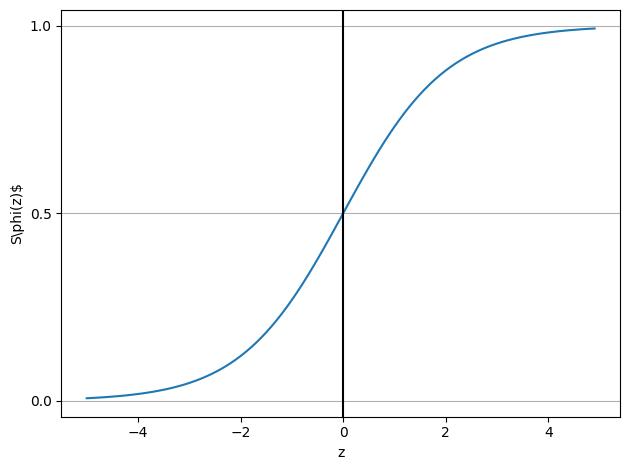

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
   return 1/(1+ np.exp(-z))

#Creating sample Z points
z= np.arange(-5, 5, 0.1)

#Invoking Sigmoid function on all Z points
phi_z=sigmoid(z)

#Plotting the Sigmoid function

plt.plot(z, phi_z)

plt.axvline(0.0, color='k')

plt.xlabel('z')

plt.ylabel('S\phi(z)$')

plt.yticks([0.0, 0.5, 1.0])

ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()

plt.show()

## CART


CART (Classification and Regression Trees) is a decision tree algorithm used for both classification and regression tasks in machine learning. It constructs a binary tree structure where each node represents a feature, each branch represents a decision rule, and each leaf node represents an outcome (class label for classification or continuous value for regression).

Explain nodes edges and leaves

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display the classification report
target_names = iris.target_names
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



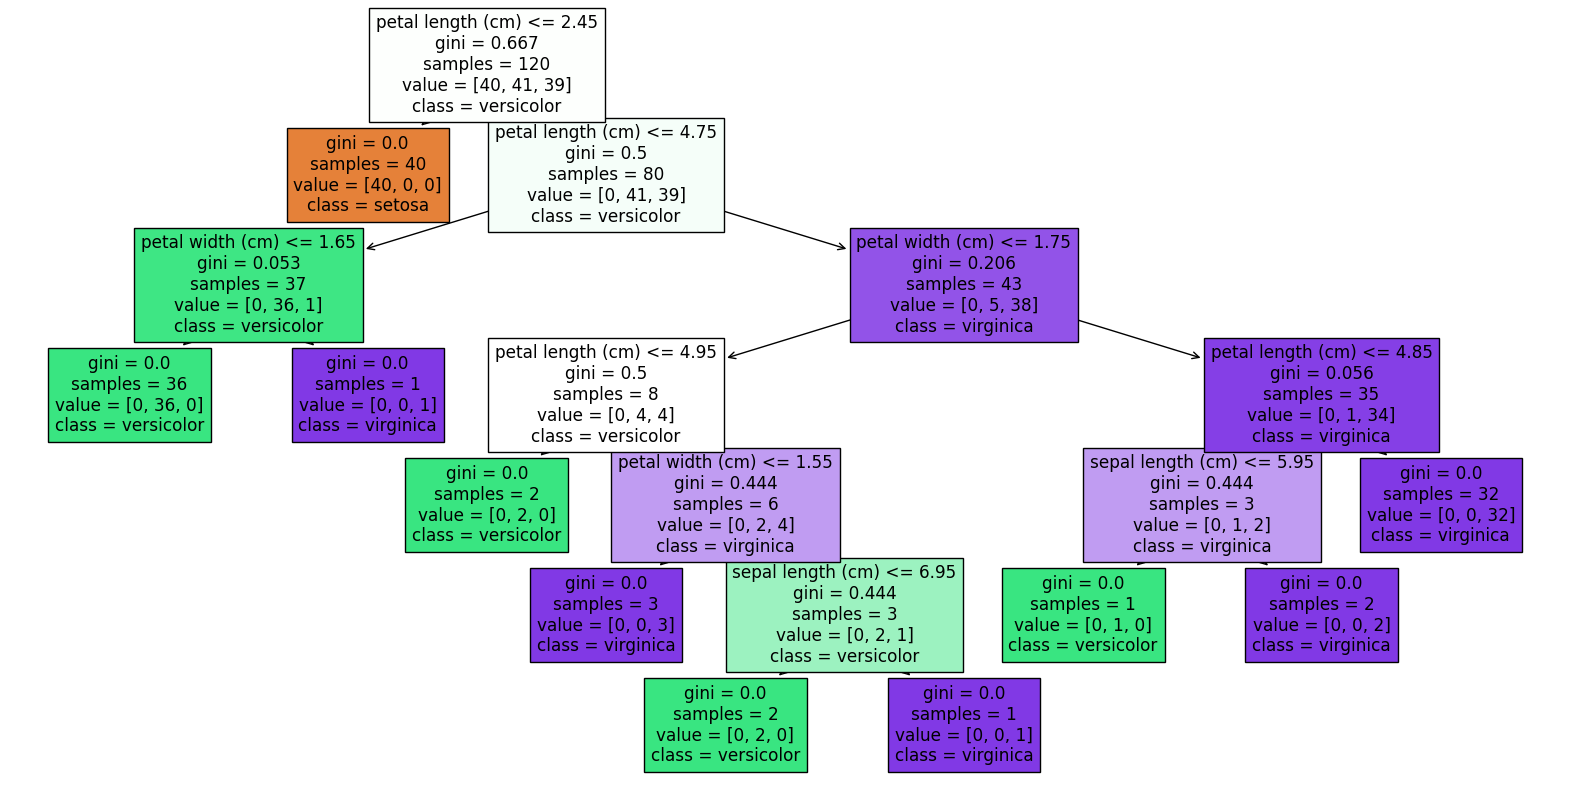

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Ensemble Learning

Ensemble Learning is a machine learning paradigm that combines multiple models to improve the overall performance of predictive tasks. The main idea behind ensemble learning is that a group of weak learners can come together to form a strong learner, thereby reducing errors, improving accuracy, and enhancing robustness compared to individual models.

Bagging
Boosting

Bagging Accuracy: 1.00
Boosting Accuracy: 1.00

Bagging Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



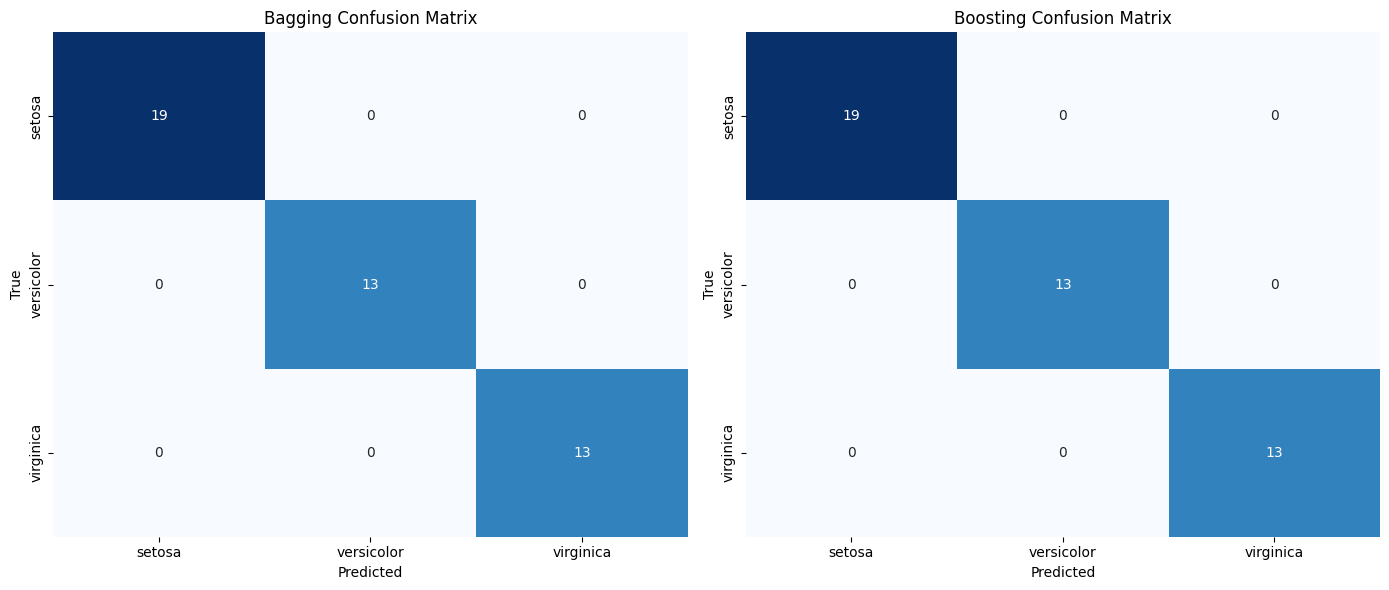

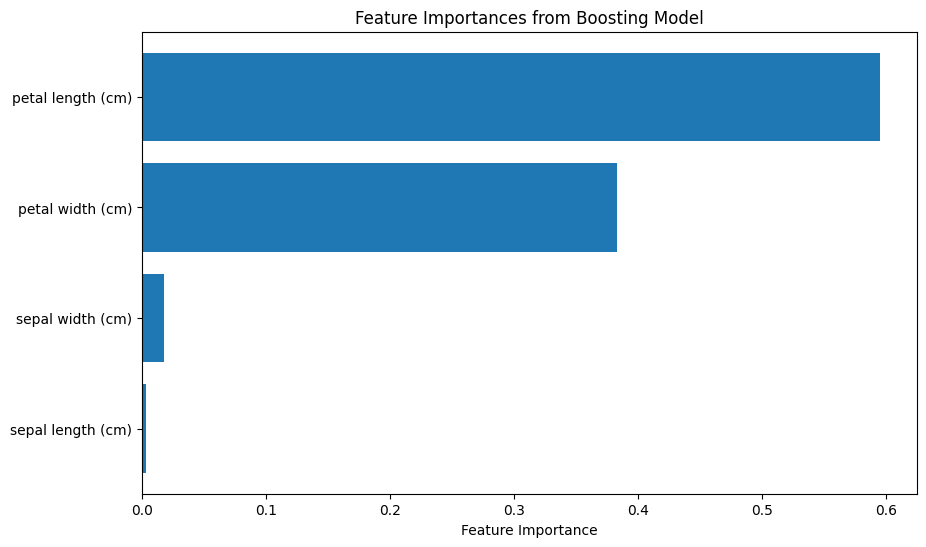

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
# Initialize base model for bagging
base_model = DecisionTreeClassifier()
# Initialize and train Bagging Classifier
bagging_model = BaggingClassifier( n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
# Initialize and train Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=50,
random_state=42)
boosting_model.fit(X_train, y_train)

boosting_preds = boosting_model.predict(X_test)
# Accuracy Scores
bagging_accuracy = accuracy_score(y_test, bagging_preds)
boosting_accuracy = accuracy_score(y_test, boosting_preds)
print(f"Bagging Accuracy: {bagging_accuracy:.2f}")
print(f"Boosting Accuracy: {boosting_accuracy:.2f}")
# Classification Reports
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_preds,
target_names=target_names))
print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_preds,
target_names=target_names))
# Confusion Matrices
bagging_cm = confusion_matrix(y_test, bagging_preds)
boosting_cm = confusion_matrix(y_test, boosting_preds)
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.heatmap(bagging_cm, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=target_names, yticklabels=target_names,

ax=axes[0])
axes[0].set_title('Bagging Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
sns.heatmap(boosting_cm, annot=True, fmt='d', cmap='Blues', cbar=False,

xticklabels=target_names, yticklabels=target_names,

ax=axes[1])
axes[1].set_title('Boosting Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
plt.tight_layout()

plt.show()
# Feature Importances for Boosting
feature_importances = boosting_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 6))
plt.barh(np.array(feature_names)[sorted_idx],
feature_importances[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Boosting Model')
plt.show()

Bagging Accuracy: 1.00

Bagging Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



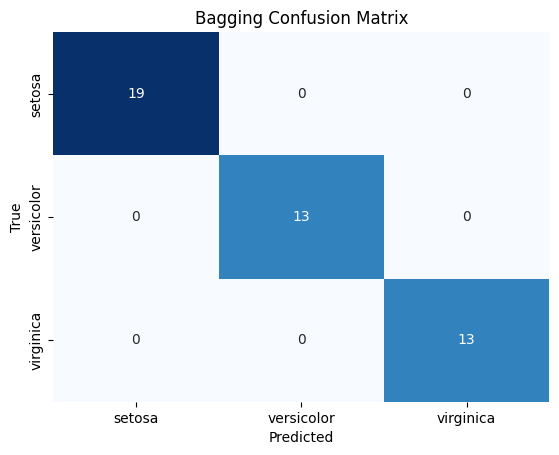

In [ ]:
# bagging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset and split into train/test sets
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize and train Bagging Classifier
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)

# Display accuracy and classification report
print(f"Bagging Accuracy: {accuracy_score(y_test, bagging_preds):.2f}")
print("\nBagging Classification Report:")
print(classification_report(y_test, bagging_preds, target_names=iris.target_names))

# Plot Bagging confusion matrix
sns.heatmap(confusion_matrix(y_test, bagging_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Bagging Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Boosting Accuracy: 1.00

Boosting Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



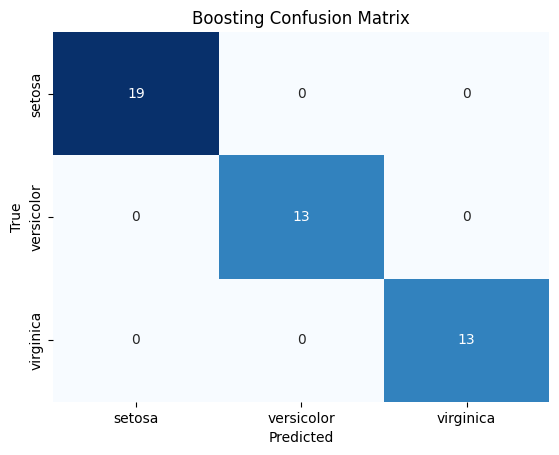

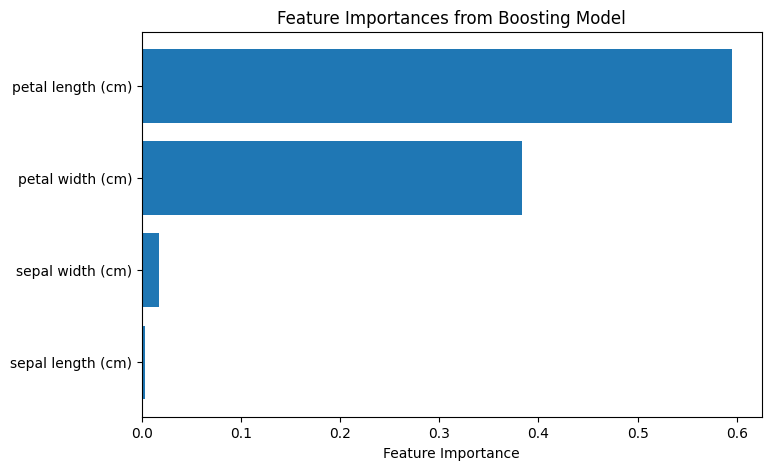

In [ ]:
# boosting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset and split into train/test sets
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize and train Boosting Classifier
boosting_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
boosting_model.fit(X_train, y_train)
boosting_preds = boosting_model.predict(X_test)

# Display accuracy and classification report
print(f"Boosting Accuracy: {accuracy_score(y_test, boosting_preds):.2f}")
print("\nBoosting Classification Report:")
print(classification_report(y_test, boosting_preds, target_names=iris.target_names))

# Plot Boosting confusion matrix
sns.heatmap(confusion_matrix(y_test, boosting_preds), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot feature importances for Boosting
plt.figure(figsize=(8, 5))
sorted_idx = np.argsort(boosting_model.feature_importances_)
plt.barh(np.array(iris.feature_names)[sorted_idx], boosting_model.feature_importances_[sorted_idx], align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importances from Boosting Model')
plt.show()


## Graph based clustering

Graph-based clustering is a method of grouping data points into clusters based on the relationships and connections between them, represented in the form of a graph. In this approach, data points are treated as nodes (vertices) in a graph, and the relationships or similarities between them are represented as edges

Explain nodes edges and leaves

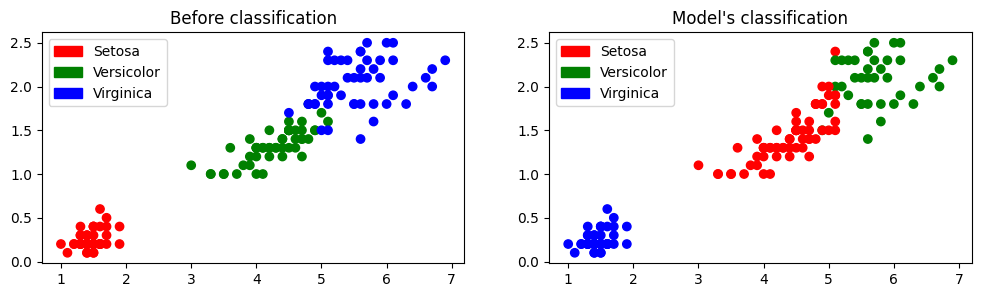

Accuracy: 0.013333333333333334


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm

# Load the iris dataset
iris = datasets.load_iris()

# Create a DataFrame from the data
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Initialize KMeans model with 3 clusters
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

# Get cluster centers and labels
iris_k_mean_model.cluster_centers_
iris_k_mean_model.labels_

# Plot the results
plt.figure(figsize=(12, 3))
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['red', 'green', 'blue'])

predictedY = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

# Plot before classification
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Plot after classification (model's classification)
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Display the plots
plt.show()

# Calculate accuracy
accuracy = sm.accuracy_score(predictedY, y['Target'])
print(f'Accuracy: {accuracy}')


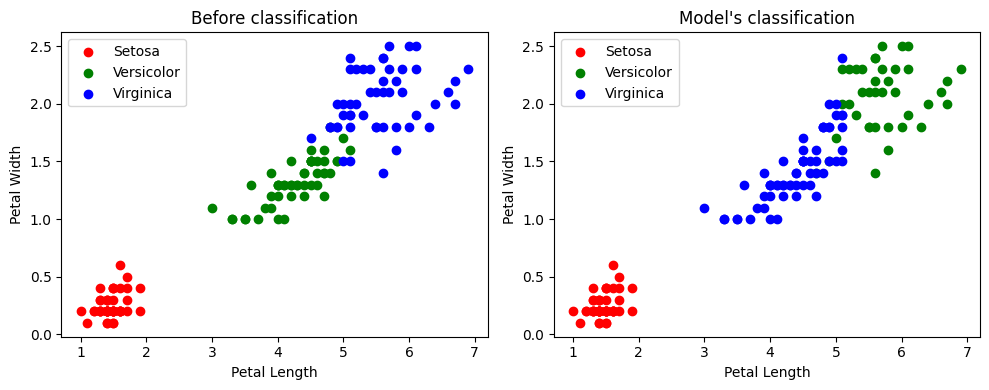

Accuracy: 0.45
Adjusted Rand Index: 0.72


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as sm

# Load iris dataset and create DataFrame
iris = datasets.load_iris()
x = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
predictedY = kmeans.fit_predict(x)

# Adjust predicted labels to match the true labels
predictedY = np.choose(predictedY, [1, 0, 2])

# Plot results before and after classification
colors = np.array(['red', 'green', 'blue'])
labels = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(10, 4))

# Before classification
plt.subplot(1, 2, 1)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(x.iloc[y == i, 2], x.iloc[y == i, 3], c=color, label=label)
plt.title('Before classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

# After classification (model's prediction)
plt.subplot(1, 2, 2)
for i, color, label in zip([0, 1, 2], colors, labels):
    plt.scatter(x.iloc[predictedY == i, 2], x.iloc[predictedY == i, 3], c=color, label=label)
plt.title("Model's classification")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate accuracy and adjusted Rand index
print(f'Accuracy: {sm.accuracy_score(y, predictedY):.2f}')
print(f'Adjusted Rand Index: {sm.adjusted_rand_score(y, predictedY):.2f}')


## DB Scan

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a popular clustering algorithm used to identify clusters in spatial data. It is particularly effective for discovering clusters of arbitrary shapes and is robust to noise and outliers. Here’s a detailed overview of how DBSCAN works:

Key Concepts of DBSCAN:
Density-Based Clustering:

DBSCAN clusters data points that are close together based on a distance measurement and a minimum number of points in a defined neighborhood. It defines clusters as dense regions separated by areas of lower density.
Core, Border, and Noise Points:

Core Point: A point that has at least a minimum number of other points (MinPts) within a specified radius (ε, epsilon). This means it is in a dense region.
Border Point: A point that is not a core point but is within the neighborhood of a core point. Border points are part of a cluster but do not have enough nearby points to form their own cluster.
Noise Point: A point that is neither a core point nor a border point. These points are considered outliers.
Parameters:
ε (epsilon): The maximum distance between two points for them to be considered as in the same neighborhood.
MinPts: The minimum number of points required to form a dense region (i.e., to qualify a point as a core point).
Algorithm Steps:
Select an unvisited point from the dataset.
Retrieve all points within the ε neighborhood of the selected point.
If the number of points in this neighborhood is greater than or equal to MinPts, classify the selected point as a core point and form a new cluster.
Expand the cluster by retrieving all density-reachable points from the core point. This involves checking all points in the neighborhood of core points and recursively finding other core points and their neighborhoods.
If the selected point is not a core point, label it as a noise point.
Repeat the process for all unvisited points in the dataset.
Advantages:
Arbitrary Shape Clustering: Can find clusters of arbitrary shapes, unlike methods like K-means which assume spherical clusters.
Noise Handling: Effectively identifies noise and outliers, making it robust in real-world datasets.
No Need for Predefined Number of Clusters: Unlike K-means, there's no need to specify the number of clusters beforehand.
Disadvantages:
Parameter Sensitivity: The performance of DBSCAN is sensitive to the choice of ε and MinPts parameters. If not chosen carefully, it can lead to poor clustering results.
Difficulty with Varying Densities: DBSCAN may struggle to identify clusters with varying densities since the ε and MinPts values are global parameters.
High Dimensionality: Performance may degrade in high-dimensional spaces due to the "curse of dimensionality," where distance measures become less meaningful.
Applications:
Geospatial Data Analysis: Used in geographic information systems (GIS) for clustering geographical locations.
Anomaly Detection: Effective in detecting outliers in various datasets, such as fraud detection.
Image Processing: Used for segmenting images based on pixel density.
Biological Data: Often applied in genetics for clustering gene expression data.
Summary:
DBSCAN is a powerful density-based clustering algorithm that is effective for discovering clusters of arbitrary shapes and is robust against noise and outliers. By focusing on the density of points in the feature space, it provides a versatile and practical solution for many clustering problems in various domains.

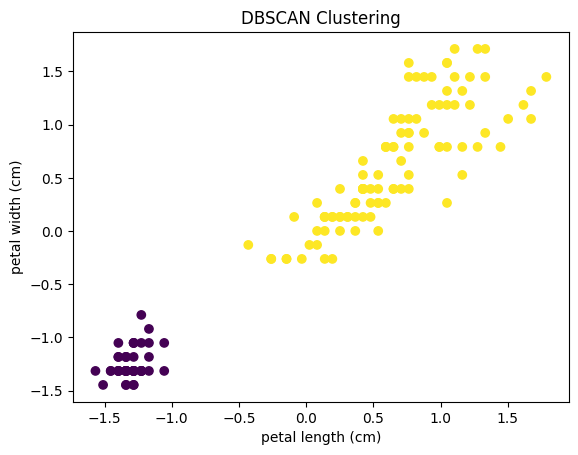

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X= iris.data[:, 2:4]

X = StandardScaler().fit_transform(X)

dbscan_model = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan_model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('DBSCAN Clustering')
plt.show()

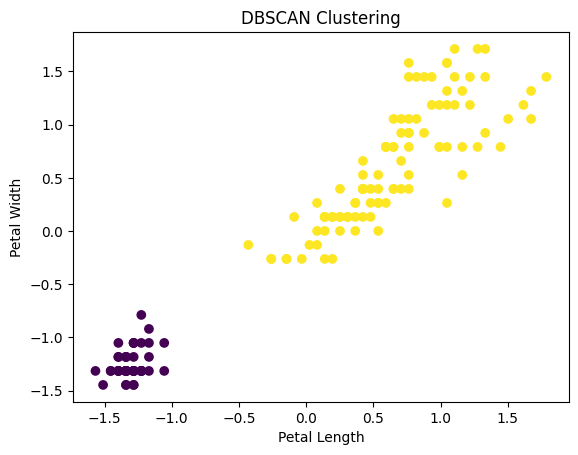

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(datasets.load_iris().data[:, 2:4])

clusters = DBSCAN(eps=0.5, min_samples=5).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('DBSCAN Clustering')
plt.show()


## PCA


Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction while preserving as much variance as possible in the dataset. It transforms the original features into a new set of uncorrelated features called principal components. These components are ordered such that the first few retain most of the variation present in all of the original features.

Key Concepts of PCA:
Dimensionality Reduction:

PCA reduces the number of variables (features) in a dataset while retaining the essential information. This is particularly useful in high-dimensional datasets.

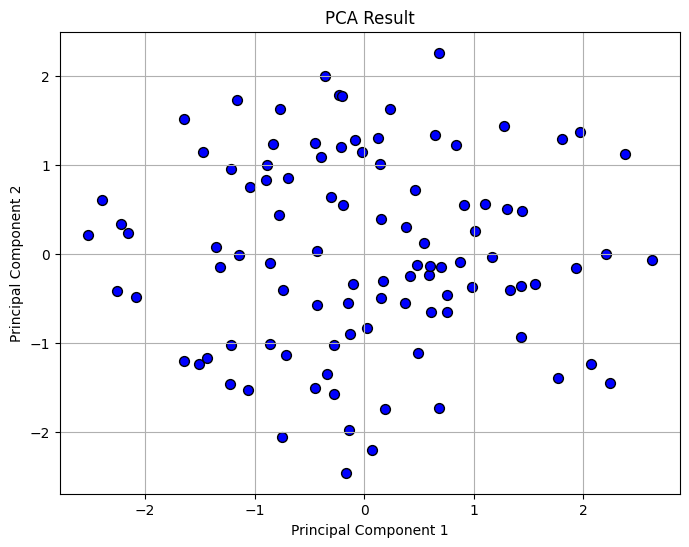

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Generate synthetic data
np.random.seed(0)
n_samples = 100
n_features = 5
# Create a random dataset with 5 features
X = np.random.rand(n_samples, n_features)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)
# Plot the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

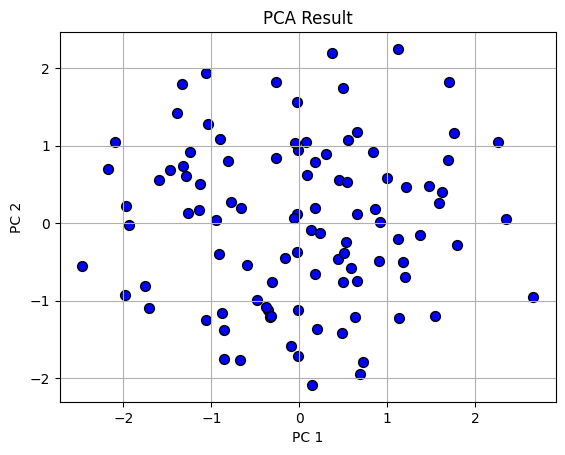

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(np.random.rand(100, 5))

X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA Result')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()
